### 1. Import các thư viện 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

./kaggle/input\titanic\gender_submission.csv
./kaggle/input\titanic\test.csv
./kaggle/input\titanic\train.csv


### 2. Đọc các tệp dataset vào train và test.

In [ ]:
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")

### 3. Kiểm tra tập train

In [ ]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.head()

In [687]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [688]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [689]:
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_common_embarked)

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)

train_data.drop(columns=['PassengerId'], inplace=True)
test_data.drop(columns=['PassengerId'], inplace=True)

In [690]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [691]:
train_data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [692]:
train_data["Title"] = train_data["Name"].str.extract(r",\s*([^\.]*)\.")
test_data["Title"] = test_data["Name"].str.extract(r",\s*([^\.]*)\.")

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_18132\2432131351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="Title", order=train_data["Title"].value_counts().index, palette="viridis")


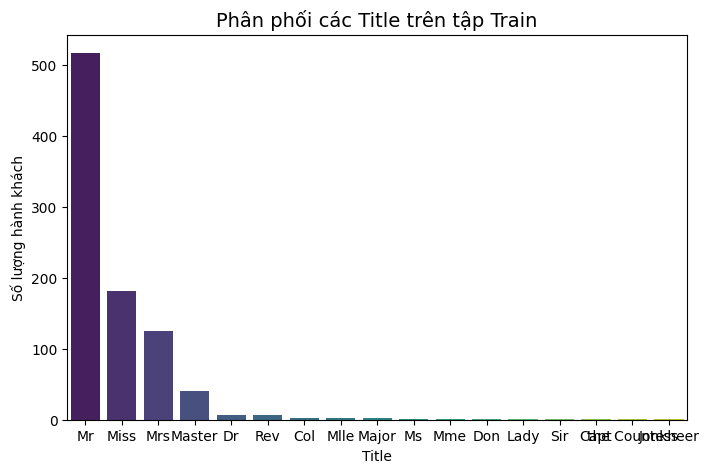

In [693]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="Title", order=train_data["Title"].value_counts().index, palette="viridis")

plt.title("Phân phối các Title trên tập Train", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng hành khách")
plt.show()

In [694]:
train_data['Title'] = train_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
train_data['Title'] = train_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')
test_data['Title'] = test_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
test_data['Title'] = test_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_18132\3021317157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Title", data=train_data, order=train_data["Title"].value_counts().index, palette="Set2")


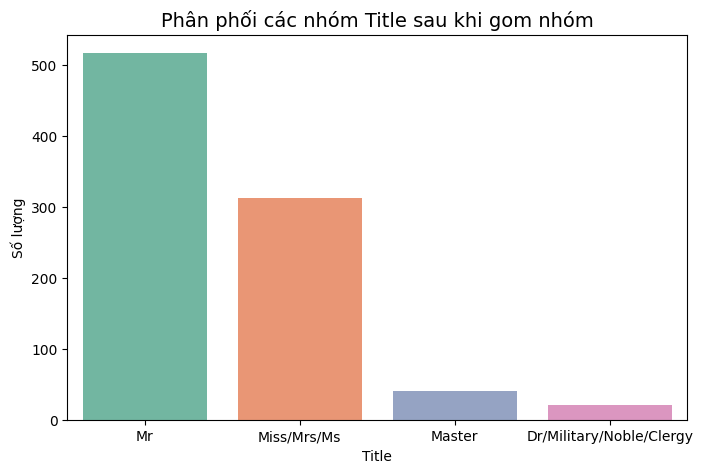

In [695]:
plt.figure(figsize=(8,5))
sns.countplot(x="Title", data=train_data, order=train_data["Title"].value_counts().index, palette="Set2")
plt.title("Phân phối các nhóm Title sau khi gom nhóm", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng")
plt.show()

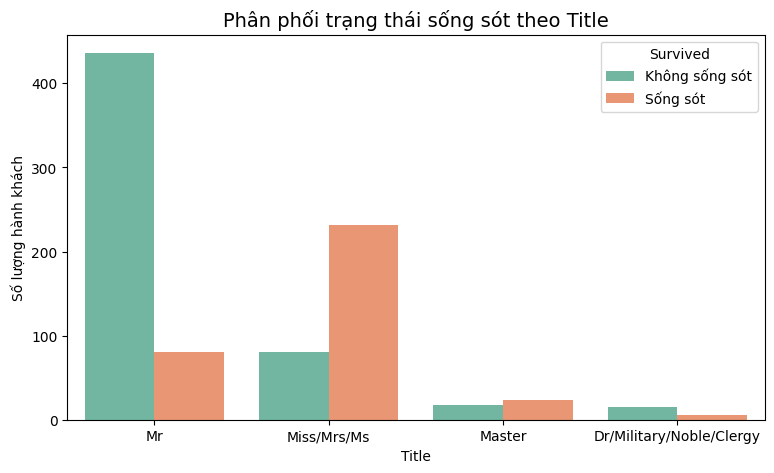

In [696]:
plt.figure(figsize=(9, 5))
sns.countplot(
    data=train_data,
    x="Title",
    hue="Survived",
    palette="Set2",
    order=train_data["Title"].value_counts().index
)

plt.title("Phân phối trạng thái sống sót theo Title", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng hành khách")
plt.legend(title="Survived", labels=["Không sống sót", "Sống sót"])
plt.show()

In [697]:
train_data.drop(columns=['Name'], inplace=True)
test_data.drop(columns=['Name'], inplace=True)

In [698]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
dtype: int64

In [699]:
#test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(
    test_data.groupby('Title')['Age'].transform('mean')
)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [700]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())

0
0


In [701]:
print(train_data.select_dtypes(include=['object']).columns)

Index(['Sex', 'Embarked', 'Title'], dtype='object')


In [702]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)

In [703]:
print(train_data.select_dtypes(include=['object']).columns)

Index([], dtype='object')


Survived
0    549
1    342
Name: count, dtype: int64


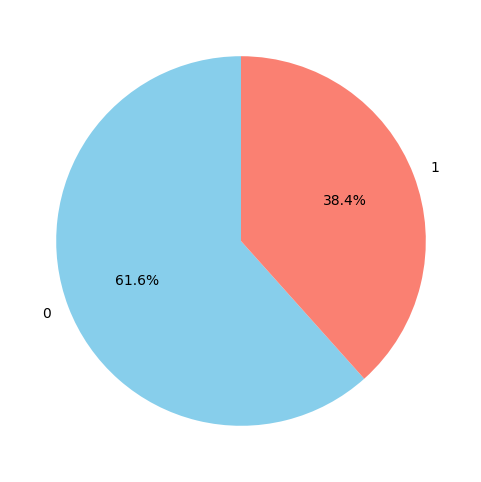

In [704]:
counts = train_data["Survived"].value_counts()
print(counts)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.show()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

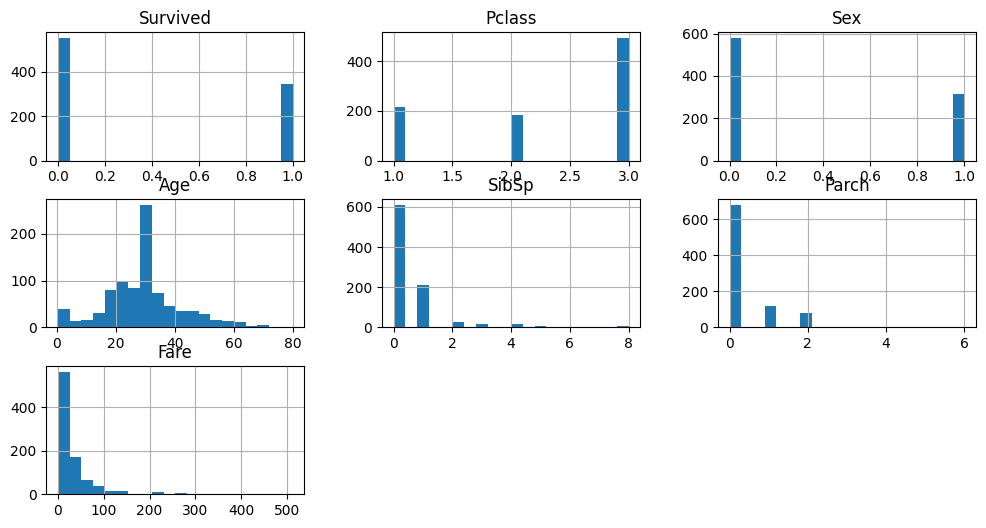

In [705]:
train_data.hist(figsize=(12, 6), bins = 20, sharex = False, sharey = False)

In [706]:
train_data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

Survived       Axes(0.125,0.53;0.133621x0.35)
Pclass      Axes(0.285345,0.53;0.133621x0.35)
Sex          Axes(0.44569,0.53;0.133621x0.35)
Age         Axes(0.606034,0.53;0.133621x0.35)
SibSp       Axes(0.766379,0.53;0.133621x0.35)
Parch          Axes(0.125,0.11;0.133621x0.35)
Fare        Axes(0.285345,0.11;0.133621x0.35)
dtype: object

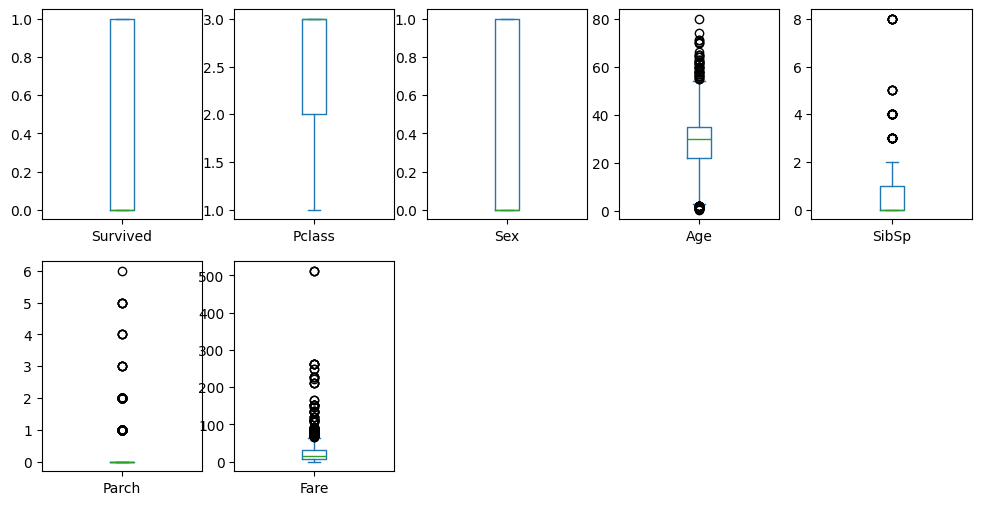

In [707]:
train_data.plot(kind="box", subplots=True, layout=(2, 5), sharex=False, sharey=False, figsize=(12,6))

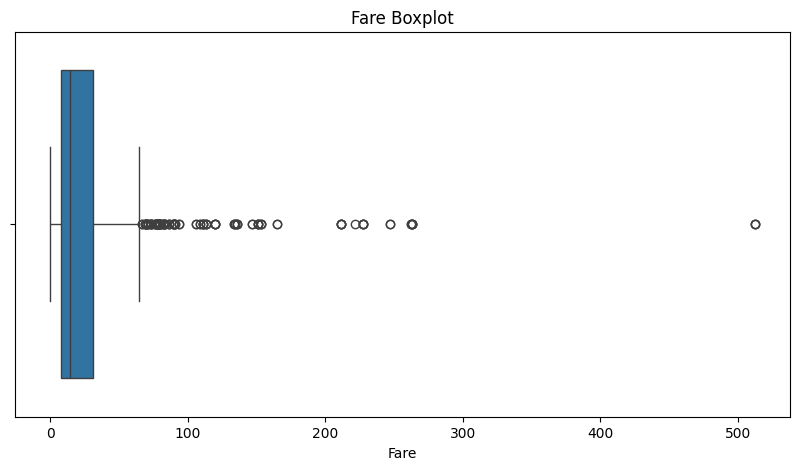

In [708]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train_data['Fare'])
plt.title('Fare Boxplot')
plt.show()

In [709]:
train_data['Fare'] = train_data['Fare'].apply(np.log1p)
test_data['Fare'] = test_data['Fare'].apply(np.log1p)

In [710]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    train_data[col] = scaler.fit_transform(train_data[[col]])
    test_data[col] = scaler.transform(test_data[[col]])


<Axes: >

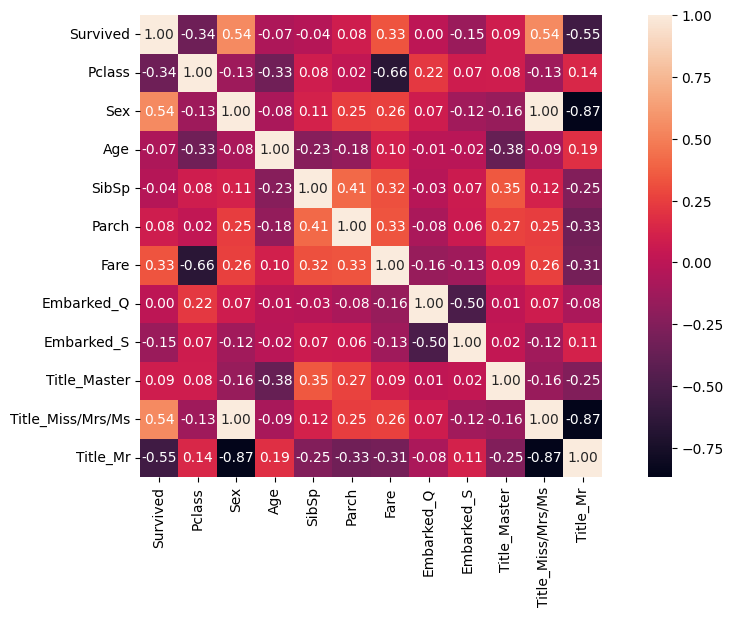

In [711]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

corrMat = train_data.corr()
plt.subplots(figsize=(12, 6))
sns.heatmap(corrMat, annot = True, fmt='.2f', annot_kws={'size': 10}, vmax=1.0, square=True)


In [712]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:,1]

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"{name} Results:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC:  {roc_auc:.4f}")
    print("-" * 30)

Logistic Regression Results:
  Accuracy: 0.8324
  F1 Score: 0.7727
  ROC AUC:  0.8713
------------------------------
Random Forest Results:
  Accuracy: 0.8492
  F1 Score: 0.7939
  ROC AUC:  0.8458
------------------------------
XGBoost Results:
  Accuracy: 0.7989
  F1 Score: 0.7391
  ROC AUC:  0.8306
------------------------------


In [714]:
best_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)
best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)

print("Actual values (first 10):")
print(y_val.head(10))

print("\nPredicted values (first 10):")
print(pd.Series(y_val_pred).head(10))


Actual values (first 10):
565    0
160    0
553    1
860    0
241    1
559    1
387    1
536    0
698    0
99     0
Name: Survived, dtype: int64

Predicted values (first 10):
0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    0
8    0
9    0
dtype: int64


In [715]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.75      0.79        69

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

Confusion Matrix:
[[100  10]
 [ 17  52]]


In [716]:
# Re-create the original dataset.
test_data_orig = pd.read_csv("./kaggle/input/titanic/test.csv")

# Get the predicted data from test
test_preds = best_model.predict(test_data)

# Create a submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_data_orig["PassengerId"],
    "Survived": test_preds
})

# Export to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created.")

Submission file 'submission.csv' created.
